In [1]:
#import Pandas to read in file

In [2]:
import pandas as pd

In [3]:
# read in file for analysis

In [4]:
otter = pd.read_csv(r'/Users/sc1108/OneDrive - University of Exeter/Documents/Python Assessment/Data/Otter.csv')

In [5]:
# examine the data read in

In [6]:
otter.head()

,Date,Region,Region_Cat,Capture_Time,Previously_Captured,Pregnant,Sex,Sex_Cat,Age_Class,Grizzle,Nose_Wound,Weight,Length,Girth,Tail_Length,paw_width,Tooth_Wear,Canine_width
0,05-Nov-08,BSR,1,10:40,NO,NO,Male,1,Adult,3.0,3.0,26.3,125.8,71.0,31.0,33.5,Heavy,9.0
1,23-Sep-10,BSR,1,13:50,YES,NO,Female,2,Adult,3.0,3.0,21.0,117.7,76.0,31.3,40.0,Light,7.0
2,05-Nov-08,BSR,1,10:45,NO,NO,Female,2,Adult,2.0,2.0,17.2,109.0,73.5,27.9,28.9,Light,8.0
3,05-Nov-08,BSR,1,10:45,NO,NO,Female,2,Adult,4.0,3.0,22.2,116.0,75.4,29.5,40.5,Moderate,8.0
4,05-Nov-08,BSR,1,11:07,NO,NO,Female,2,Adult,5.0,3.0,21.3,114.5,77.5,29.0,43.5,Light,7.6


In [7]:
#invesitgate region and sex classes through histograms

<AxesSubplot:xlabel='Region', ylabel='Count'>

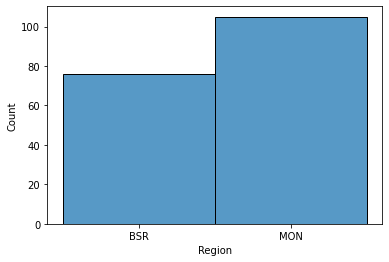

In [8]:
#import the necessary python module
import seaborn as sns
#help diplay the plot in notebooks
%matplotlib inline

sns.histplot(data= otter, x='Region')

In [9]:
#More sea otter data was collected in Monterey Bay than in the Big Sur

<AxesSubplot:xlabel='Sex', ylabel='Count'>

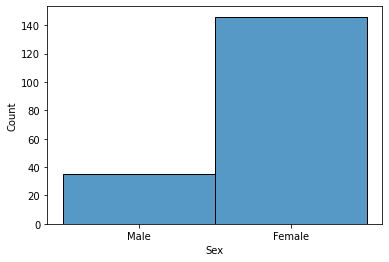

In [10]:
sns.histplot(data= otter, x='Sex')

In [11]:
#the dataset has more data collected on females than males

In [12]:
# combine these results

<AxesSubplot:xlabel='Region', ylabel='count'>

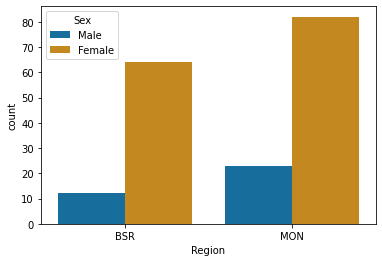

In [13]:
sns.countplot(x='Region', 
                 data=otter, 
                 palette="colorblind",
                 hue='Sex')

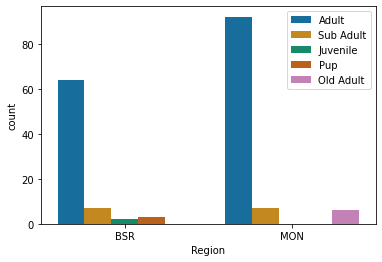

In [14]:
#import python module necessary
import matplotlib.pyplot as plt
sns.countplot(x='Region', 
                 data=otter, 
                 palette="colorblind",
                 hue='Age_Class')
#move the legend so it does not cover data points
plt.legend(loc='upper right')

In [15]:
# Investigate which variables are correlated with each other through the corr function

In [16]:
cmapdata = otter.drop(columns=["Sex_Cat", "Region_Cat"])
corr = cmapdata.corr()

In [17]:
corr

,Grizzle,Nose_Wound,Weight,Length,Girth,Tail_Length,paw_width,Canine_width
Grizzle,1.000000,0.194564,0.379590,0.385471,0.395318,0.127829,0.173730,0.263845
Nose_Wound,0.194564,1.000000,-0.216702,-0.060177,-0.033030,0.126533,-0.112272,-0.026145
Weight,0.379590,-0.216702,1.000000,0.861752,0.697549,0.271551,0.390731,0.653796
Length,0.385471,-0.060177,0.861752,1.000000,0.631626,0.449757,0.393530,0.681088
Girth,0.395318,-0.033030,0.697549,0.631626,1.000000,0.229095,0.205549,0.388887
Tail_Length,0.127829,0.126533,0.271551,0.449757,0.229095,1.000000,0.103708,0.240693
paw_width,0.173730,-0.112272,0.390731,0.393530,0.205549,0.103708,1.000000,0.448813
Canine_width,0.263845,-0.026145,0.653796,0.681088,0.388887,0.240693,0.448813,1.000000


In [18]:
#visulise these correlation results as a heat map with divergent colours

<AxesSubplot:>

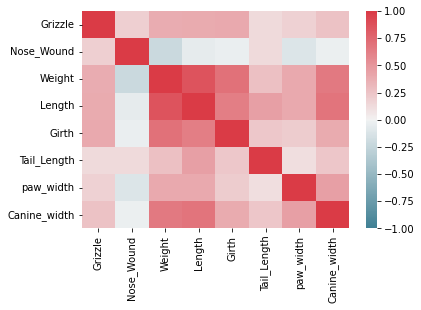

In [19]:
# create a diverging colourmap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, vmin=-1.0, vmax=1.0, cmap=cmap)


In [20]:
#length and weight seem to be highly correlated, as well as with girth and canine width

In [21]:
#visulise the distribution of sea otter weight by sex

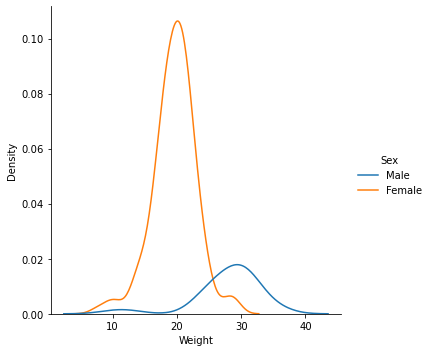

In [22]:
sns.displot(data=otter, x="Weight", hue="Sex", kind="kde")

In [23]:
# Males seem to have a higher weight throughout the study than females

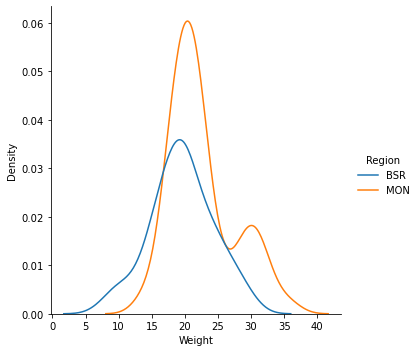

In [24]:
sns.displot(data=otter, x="Weight", hue="Region", kind="kde")

In [25]:
#Monteray is displaying a bimodal distribution for weight most likely displaying the differences in weight between males and females. BSR possibly does not follow this same trend due to the limited data collected on males (n=12)

In [26]:
#plot the differences in weight between region and sex as a bargraph

<AxesSubplot:xlabel='Region', ylabel='Weight'>

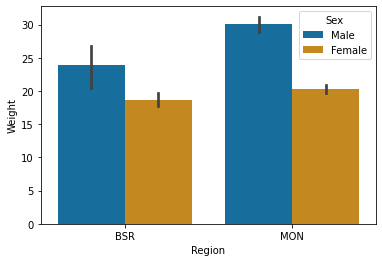

In [27]:
sns.barplot(y='Weight', x='Region', 
                 data=otter, 
                 palette="colorblind",
                 hue='Sex')

In [28]:
#this displays that male weight from the BSR was much more variable than in MON and much more comparable to female weight

In [29]:
#display the differences in each variable for each sex

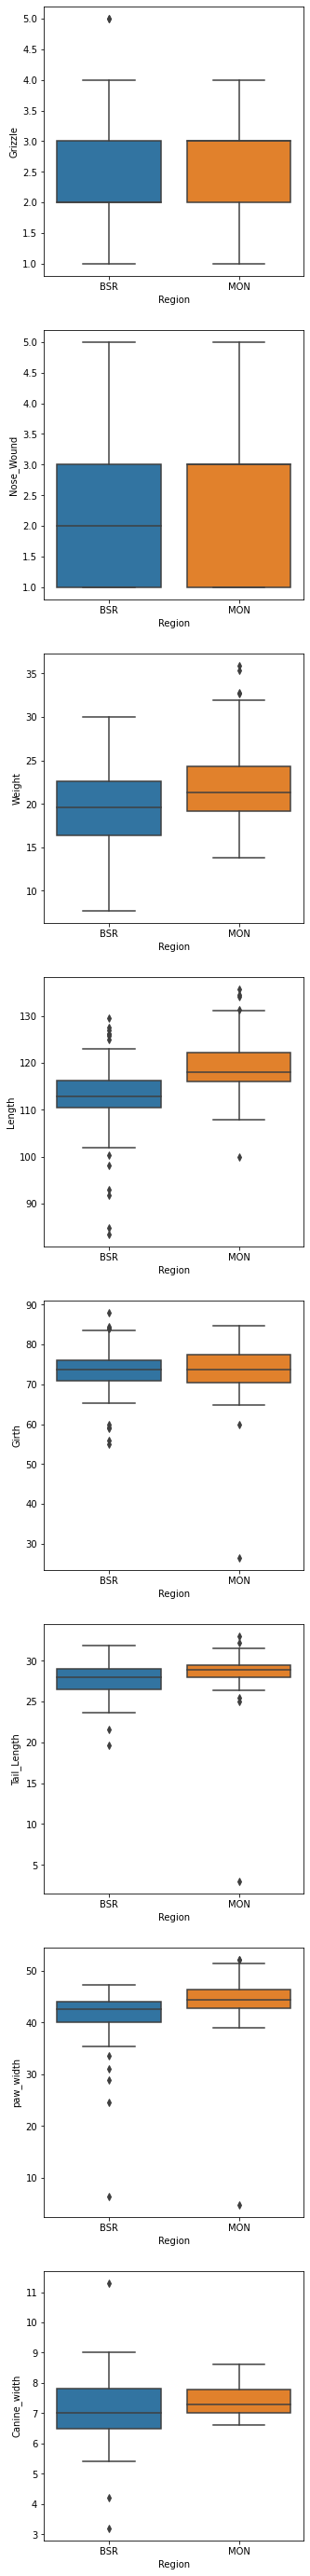

In [30]:
# Create 8 axes - each size 5 by 50
fig, axes_list = plt.subplots(8, figsize=(5, 50))
#define all the variables for y axis of boxplot
predictors = ["Grizzle", "Nose_Wound", "Weight", "Length", "Girth", "Tail_Length", "paw_width", "Canine_width"]

#for each of the variables going down the column, plot a boxplot with x axis as sex and y as predictors defined earlier
for ax, col in zip(axes_list, predictors):
   		 sns.boxplot(data=otter, x="Region", y=col, ax=ax)

In [31]:
# Grizzle and nose wounds seem to be similar for both, however weight, length and paw width were greater in Monterey
#with girth, tail length and canine width also higher

In [32]:
#now to compare between sexes

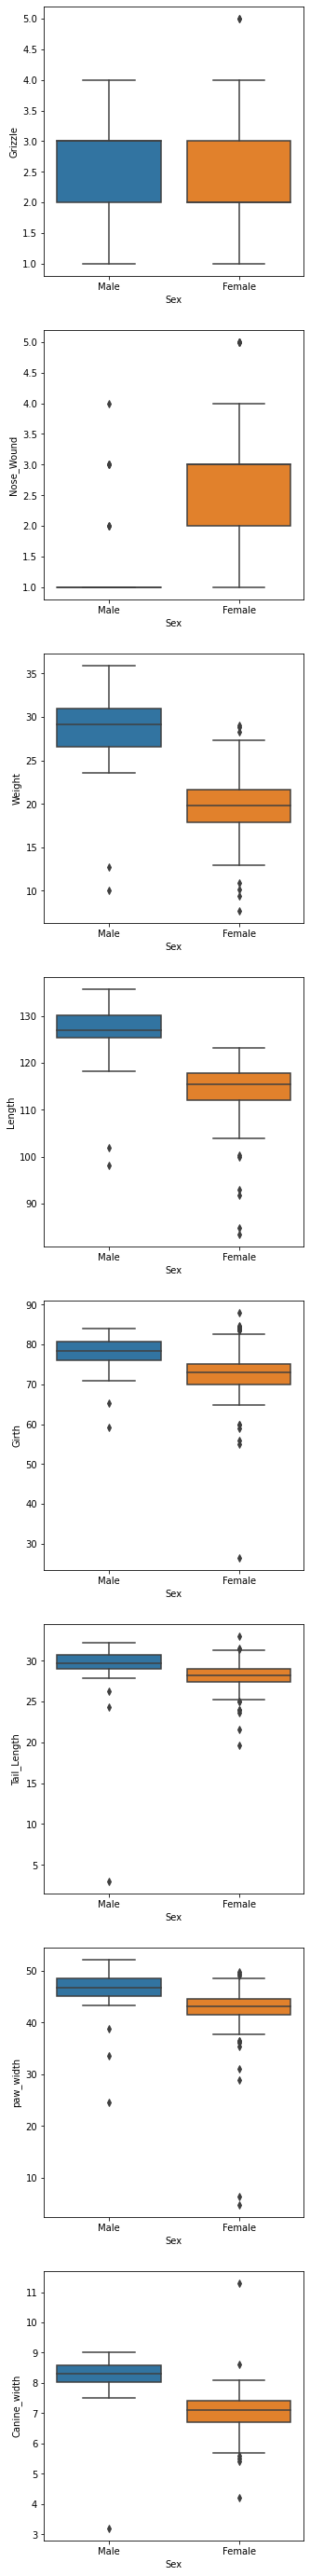

In [33]:
# Create 8 axes - each size 5 by 50
fig, axes_list = plt.subplots(8, figsize=(5, 50))
#define all the variables for y axis of boxplot
predictors = ["Grizzle", "Nose_Wound", "Weight", "Length", "Girth", "Tail_Length", "paw_width", "Canine_width"]

#for each of the variables going down the column, plot a boxplot with x axis as sex and y as predictors defined earlier
for ax, col in zip(axes_list, predictors):
   		 sns.boxplot(data=otter, x="Sex", y=col, ax=ax)

In [34]:
# although grizzle was comparable between sexes, males were seen to be bigger in all variables other than nose wounds where females were predominantly the ones who were injured

In [35]:
# Now I will look into which variables were most important in distinguishing between regions and sex by doing a PCA plot
# Unfortunately the variables: nose wounds, Canine Width and grizzle were removed due to Nans in the dataset

In [36]:
#import necessary python module
from sklearn.preprocessing import StandardScaler
features = ["Weight", "Length", "Girth", "Tail_Length", "paw_width"]

x = otter.loc[:, features].values
# Separating out by Region
y1 = otter.loc[:,['Region']].values
# Standardise the features onto unit scale
x = StandardScaler().fit_transform(x)


In [37]:
#make PCA model
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, otter[['Region']]], axis = 1)
finalDf

,principal component 1,principal component 2,Region
0,-0.793071,-1.889650,BSR
1,-0.405992,-1.264679,BSR
2,1.813312,-1.621208,BSR
3,-0.199708,-0.640231,BSR
4,-0.260999,-0.147355,BSR
...,...,...,...
176,-0.043135,-0.016174,MON
177,-3.311431,0.375848,MON
178,-0.634331,0.186452,MON
179,-2.627309,-0.095724,MON


In [38]:
#plot PCA model

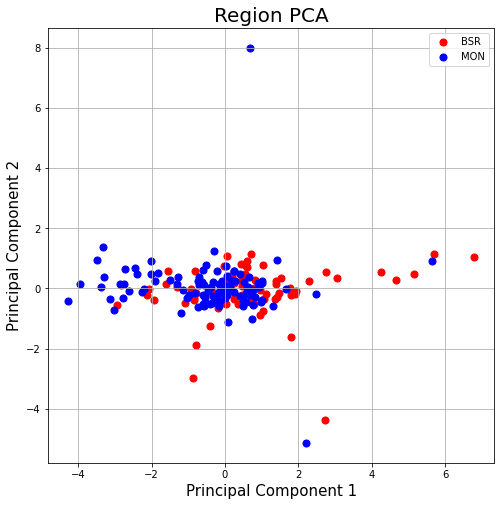

In [39]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Region PCA', fontsize = 20)
Region = ['BSR', 'MON']
colors = ['r', 'b']
for Regions, color in zip(Region,colors):
    indicesToKeep = finalDf['Region'] == Regions
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(Region)
ax.grid()

In [40]:
#PCA for sexes

features = ["Weight", "Length", "Girth", "Tail_Length", "paw_width"]

x2 = otter.loc[:, features].values
# Separating out by Sex
y2 = otter.loc[:,['Sex']].values
# Standardise the features onto unit scale
x2 = StandardScaler().fit_transform(x2)


In [41]:
#make PCA model
pca2 = PCA(n_components=2)
principalComponents2 = pca2.fit_transform(x)
principalDf2 = pd.DataFrame(data = principalComponents2
             , columns = ['principal component 1', 'principal component 2'])
finalDf2 = pd.concat([principalDf2, otter[['Sex']]], axis = 1)
finalDf2

,principal component 1,principal component 2,Sex
0,-0.793071,-1.889650,Male
1,-0.405992,-1.264679,Female
2,1.813312,-1.621208,Female
3,-0.199708,-0.640231,Female
4,-0.260999,-0.147355,Female
...,...,...,...
176,-0.043135,-0.016174,Female
177,-3.311431,0.375848,Male
178,-0.634331,0.186452,Female
179,-2.627309,-0.095724,Male


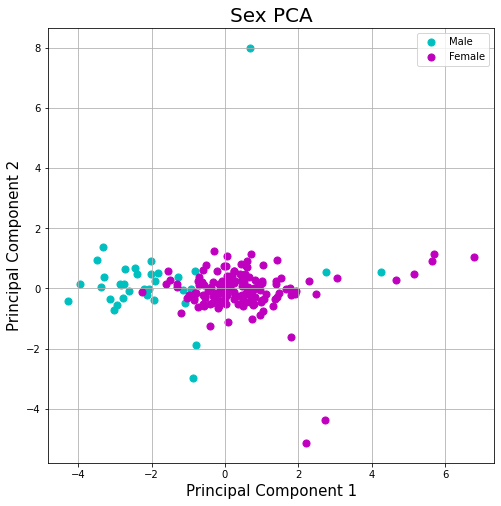

In [42]:
#make plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Sex PCA', fontsize = 20)
Sex = ['Male', 'Female']
colors = ['c', 'm']
for Sexes, color in zip(Sex,colors):
    indicesToKeep = finalDf2['Sex'] == Sexes
    ax.scatter(finalDf2.loc[indicesToKeep, 'principal component 1']
               , finalDf2.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(Sex)
ax.grid()

In [43]:
#see the explained varience of each principle component

In [44]:
pca.explained_variance_ratio_

array([0.56720713, 0.18168821])

In [45]:
#here we can see that PC1 explains 57% of the variance and PC2 18%, together explaining 75% of the total variance

In [46]:
#find the most important feature
print(abs( pca.components_ ))

[[0.54532617 0.55347922 0.46797717 0.2917738  0.30355485]
 [0.11335101 0.05864526 0.00749961 0.7562087  0.6417199 ]]


In [47]:
#here length and weight are the most important features in PC1, whilst tail lengeth and paw width are explained the most varience in PC2

In [48]:
#due to these results I shall use Weight and length to predict the Region and sex of a given sea otter

In [49]:
#import python modules needed
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split

In [50]:
#Classification model for Sex using Weight and Length input

In [51]:
Xsex = pd.DataFrame(otter, columns=["Weight", "Length"])

In [52]:
ysex = otter.Sex_Cat

In [53]:
#create scatterplot

<AxesSubplot:xlabel='Weight', ylabel='Length'>

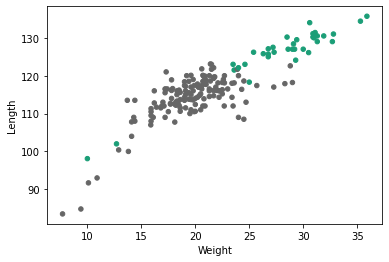

In [54]:
Xsex.plot.scatter("Weight", "Length", c=ysex, colormap="Dark2", colorbar=False)

In [55]:
#split data into training and testing dataset

In [56]:
train_Xsex, test_Xsex, train_ysex, test_ysex = train_test_split(Xsex, ysex, random_state=42)

In [57]:
#Use GridSearchCV to choose the best value for n-neighbors

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#make the model and a dictionary of parameters you want to explore
model = KNeighborsClassifier()
parameters = {
    "n_neighbors" : range(1, 100),
}
sexesmodel = GridSearchCV(model, parameters).fit(train_Xsex, train_ysex)

<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean_test_score'>

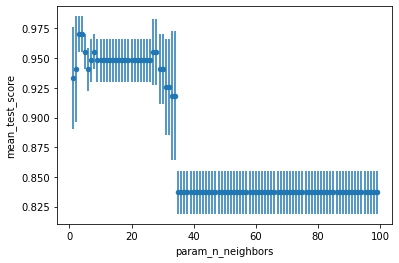

In [59]:
#visualise the data by plotting the mean test scores against n-neighbours
cv_results = pd.DataFrame(sexesmodel.cv_results_)
cv_results.plot.scatter("param_n_neighbors", "mean_test_score", yerr="std_test_score")

In [60]:
#now we can use it to plot and meaure performance of the model

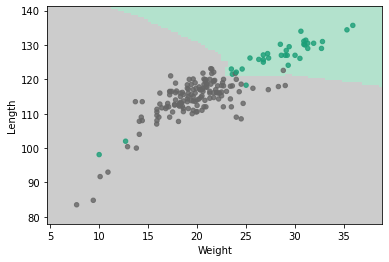

In [61]:
def plot_knn(model, Xsex, ysex, resolution=100, ax=None):
  

    x1 = Xsex.iloc[:,0]
    x2 = Xsex.iloc[:,1]
    x1_range = np.linspace(x1.min()*1.1 - x1.max()*0.1, x1.max()*1.1 - x1.min()*0.1, resolution)
    x2_range = np.linspace(x2.min()*1.1 - x2.max()*0.1, x2.max()*1.1 - x2.min()*0.1, resolution)
    grid_x1_values, grid_x2_values = np.meshgrid(x1_range, x2_range)
    x_prime = np.column_stack((grid_x1_values.ravel(), grid_x2_values.ravel()))
    x_prime = pd.DataFrame(x_prime, columns=Xsex.columns)
    y_hat = model.predict(x_prime).reshape(grid_x1_values.shape)

    if ax is None:
        fig, ax = plt.subplots()
    ax.pcolormesh(grid_x1_values, grid_x2_values, y_hat, cmap="Pastel2", alpha=1.0, shading="auto")
    Xsex.plot.scatter(0, 1, c=ysex, colormap="Dark2", colorbar=False, alpha=0.8, ax=ax)

plot_knn(sexesmodel, Xsex, ysex)

In [62]:
#measure performance of model
sexesmodel.score(test_Xsex, test_ysex)

0.9782608695652174

In [63]:
#model score 0.98

In [78]:
#input weight and length values to see which sex the model predicts
x_fit = pd.DataFrame({"Weight":[35], "Lenght":[140]})
sexesmodel.predict(x_fit)

array([1], dtype=int64)

In [65]:
#tells us it is male and the model is working

In [66]:
#Classification model for Sex using Weight and Length input

In [67]:
Xregion = pd.DataFrame(otter, columns=["Weight", "Length"])
yregion = otter.Region_Cat

<AxesSubplot:xlabel='Weight', ylabel='Length'>

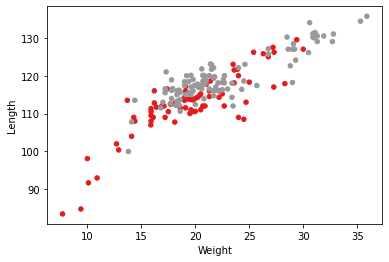

In [68]:
#create scatterplot
Xregion.plot.scatter("Weight", "Length", c=yregion, colormap="Set1", colorbar=False)

In [69]:
#split data into training and testing dataset
train_Xregion, test_Xregion, train_yregion, test_yregion = train_test_split(Xregion, yregion, random_state=42)

In [70]:
#Use GridSearchCV to choose the best value for n-neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#make the model and a dictionary of parameters you want to explore
model1 = KNeighborsClassifier()
parameters1 = {
    "n_neighbors" : range(1, 100),
}
regionsmodel = GridSearchCV(model1, parameters1).fit(train_Xregion, train_yregion)

<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean_test_score'>

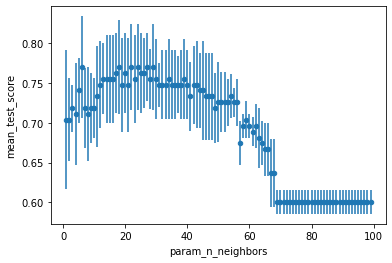

In [71]:
#visualise the data by plotting the mean test scores against n-neighbours
cv_results1 = pd.DataFrame(regionsmodel.cv_results_)
cv_results1.plot.scatter("param_n_neighbors", "mean_test_score", yerr="std_test_score")

In [72]:
#now we can use it to plot and meaure performance of the model

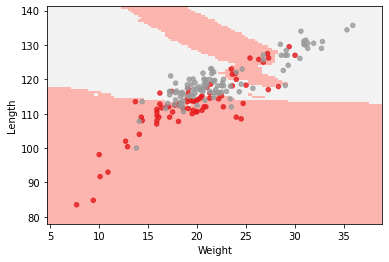

In [73]:
def plot_knn(model1, Xregion, yregion, resolution=100, ax=None):
  

    x1 = Xregion.iloc[:,0]
    x2 = Xregion.iloc[:,1]
    x1_range = np.linspace(x1.min()*1.1 - x1.max()*0.1, x1.max()*1.1 - x1.min()*0.1, resolution)
    x2_range = np.linspace(x2.min()*1.1 - x2.max()*0.1, x2.max()*1.1 - x2.min()*0.1, resolution)
    grid_x1_values, grid_x2_values = np.meshgrid(x1_range, x2_range)
    x_prime = np.column_stack((grid_x1_values.ravel(), grid_x2_values.ravel()))
    x_prime = pd.DataFrame(x_prime, columns=Xregion.columns)
    y_hat = model1.predict(x_prime).reshape(grid_x1_values.shape)

    if ax is None:
        fig, ax = plt.subplots()
    ax.pcolormesh(grid_x1_values, grid_x2_values, y_hat, cmap="Pastel1", alpha=1.0, shading="auto")
    Xregion.plot.scatter(0, 1, c=yregion, colormap="Set1", colorbar=False, alpha=0.8, ax=ax)

plot_knn(regionsmodel, Xregion, yregion)

In [74]:
#measure performance of model
regionsmodel.score(test_Xregion, test_yregion)

0.7391304347826086

In [75]:
#lower confidence in this model

In [77]:
#input weight and length values to see which region the model predicts
x_fit2 = pd.DataFrame({"Weight":[35], "Lenght":[140]})
regionsmodel.predict(x_fit2)

array([2], dtype=int64)